In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import env
import acquire
import prepare

In [ ]:
#Part I - Using iris data from our MySQL server and the methods used in the lesson above:

In [ ]:
#Acquire, prepare & split your data.

In [58]:
from prepare import wrangle_data
iris = wrangle_data('iris')

In [ ]:
#Split the data up

In [73]:
from prepare import split_data
iris_train, iris_val, iris_test = split_data(iris, 'iris')

In [75]:
iris_train.head()
iris_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 138 to 54
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       84 non-null     object 
 1   sepal_length  84 non-null     float64
 2   sepal_width   84 non-null     float64
 3   petal_length  84 non-null     float64
 4   petal_width   84 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [77]:
X_iris_train = iris_train.drop(columns='species')
y_iris_train = iris_train[['species']]

[Text(0.5, 1.0, 'Count of Species by Type')]

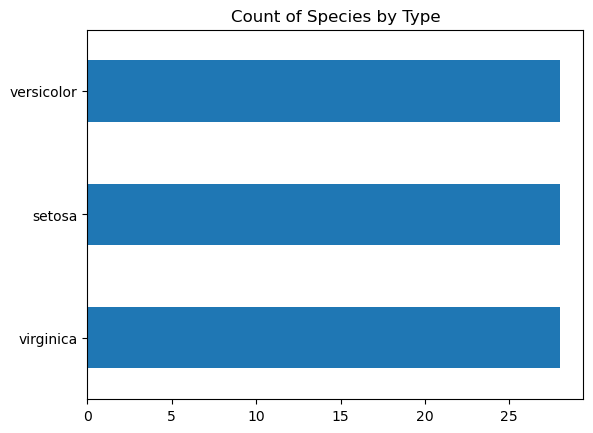

In [90]:
# initial examination of the spread of information for our target variable

iris_train['species'].value_counts().plot(kind='barh').set(title='Count of Species by Type')

In [ ]:
# This looks pretty accurate since its the train data and the overall count is 84 total or 28 per species as specified by the 'stratify' option utilized.

In [ ]:
#Univariate Stats

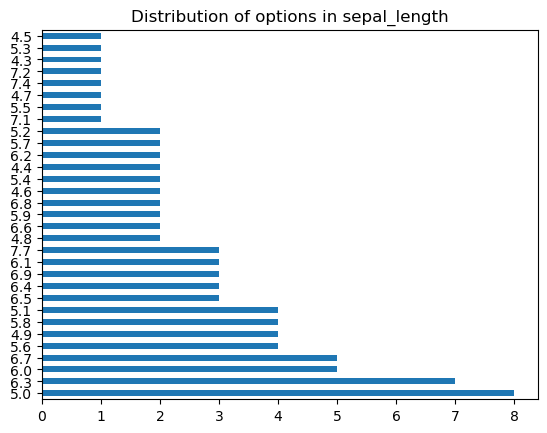

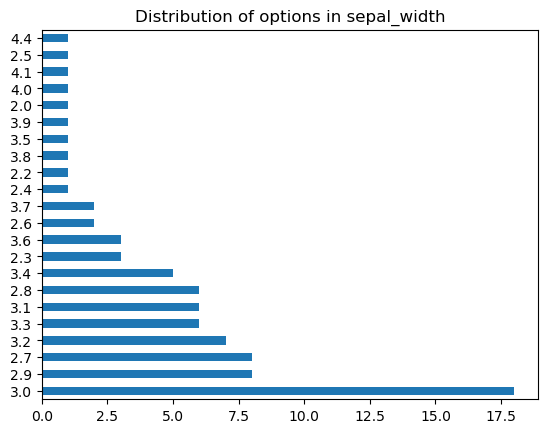

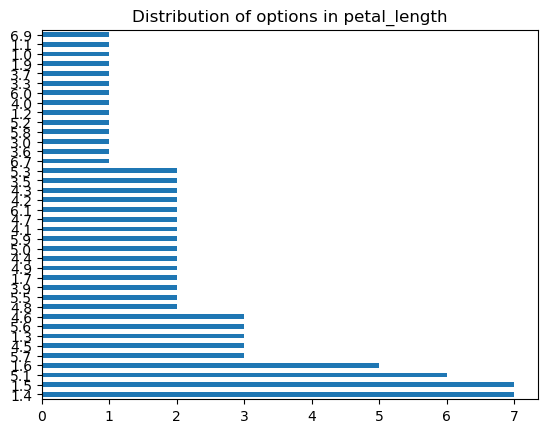

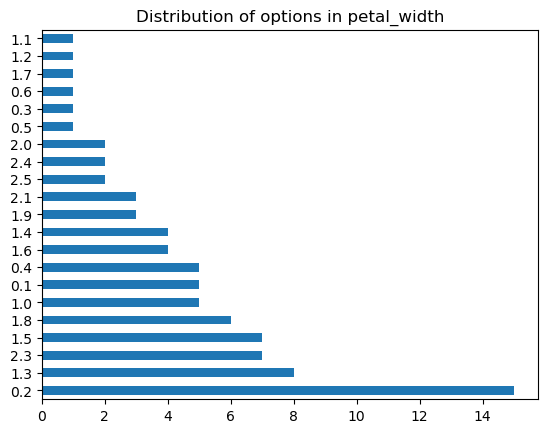

In [91]:
# lets create a loop for our features to get an understanding
# of the spread of information:

for col in X_iris_train:
    X_iris_train[col].value_counts().plot(kind='barh').set(title=f'Distribution of options in {col}')
    plt.show()

In [ ]:
#How do i separate the different species type by colors so that I can figure out what I'm looking at? Also, what's up with the labeling on the y axis?

Distribution of sepal_length


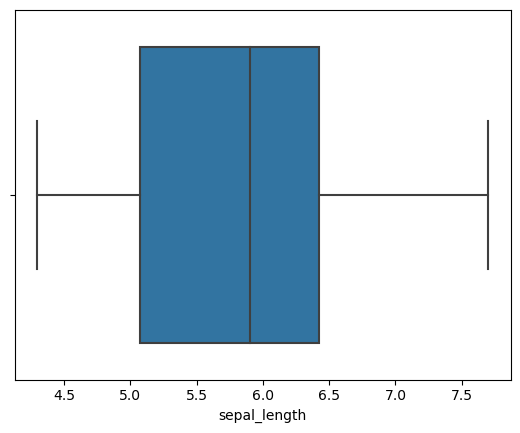

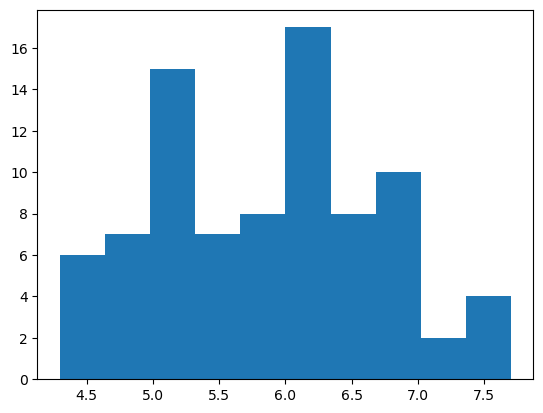

Distribution of sepal_width


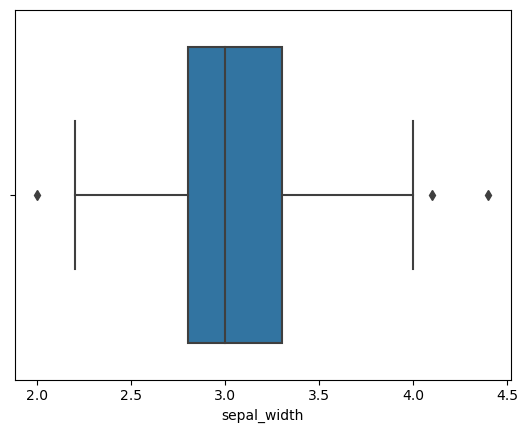

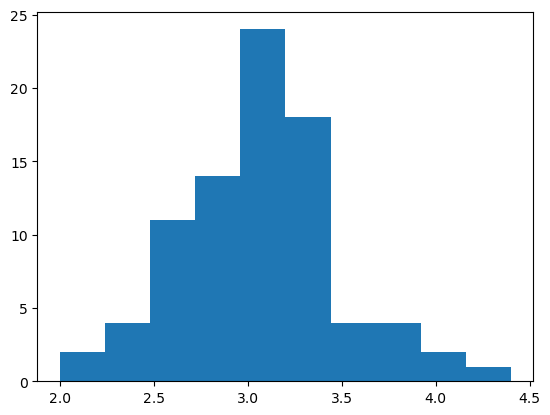

Distribution of petal_length


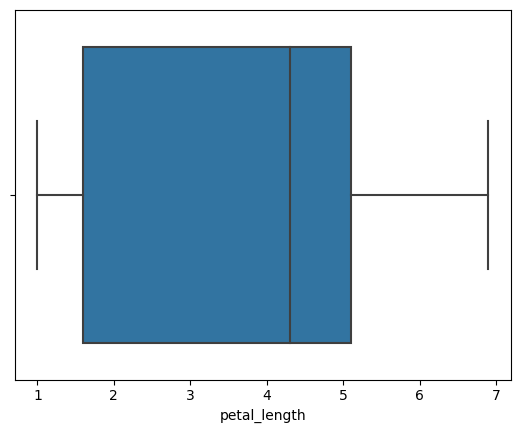

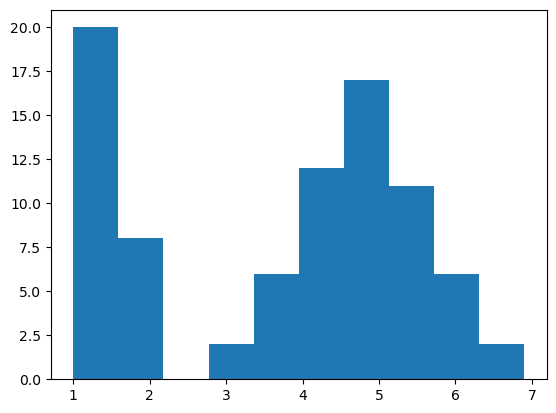

Distribution of petal_width


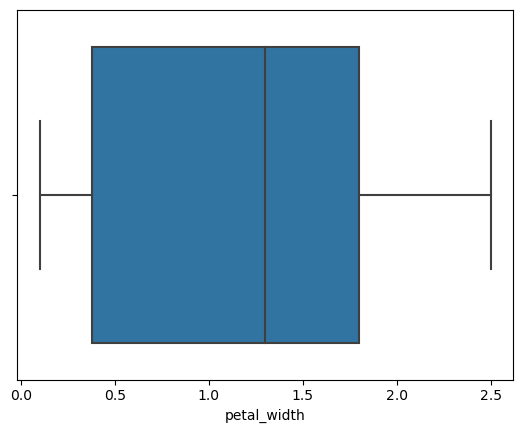

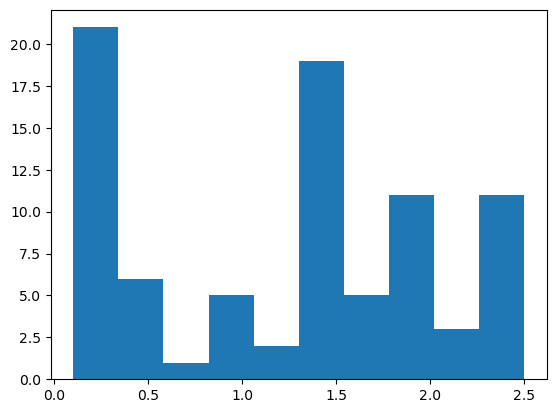

In [95]:
#To get a look at my continuous variables:

for col in X_iris_train:
    print(f'Distribution of {col}')
    sns.boxplot(data=X_iris_train, x=col)
    plt.show()
    plt.hist(X_iris_train[col])
    plt.show()
    

In [ ]:
# observations/questions/notes:


# takeaways for initial ramifications for stats testing:
#The distribution for petal width and petal length are visually not normally distributed. Sepal length and sepal width are stretches at best.
# The boxplots showcase means that have a wide range.
# A non-parametric test will likely be required for stats testing

In [ ]:
#Bivariate Stats

In [ ]:
#Multivariate Stats

In [32]:
#Part II - Explore your titanic dataset more completely.

from prepare import wrangle_data
titanic = wrangle_data('titanic')

In [68]:
from prepare import split_data
titanic_train, titanic_val, titanic_test = split_data(titanic, 'titanic')

In [80]:
titanic_train

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
474,0,3,female,22.0,0,0,9.8375,Southampton,1
370,1,1,male,25.0,1,0,55.4417,Cherbourg,0
573,1,3,female,30.0,0,0,7.7500,Queenstown,1
110,0,1,male,47.0,0,0,52.0000,Southampton,1
167,0,3,female,45.0,1,4,27.9000,Southampton,0
...,...,...,...,...,...,...,...,...,...
735,0,3,male,28.5,0,0,16.1000,Southampton,1
163,0,3,male,17.0,0,0,8.6625,Southampton,1
770,0,3,male,24.0,0,0,9.5000,Southampton,1
196,0,3,male,30.0,0,0,7.7500,Queenstown,1


In [98]:
#Determine drivers of the target variable

#### since the target variable for this data is 'survived', that means all other columns could possibly be drivers.
#### splitting the data into category and numeric buckets/variables will help with further exploration

X_train = titanic_train.drop(columns='survived')
y_train = titanic_train[['survived']]

cat_cols, num_cols = [], []
for col in X_train.columns:
    if X_train[col].dtype == 'O':
        cat_cols.append(col)
    else:
        if X_train[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

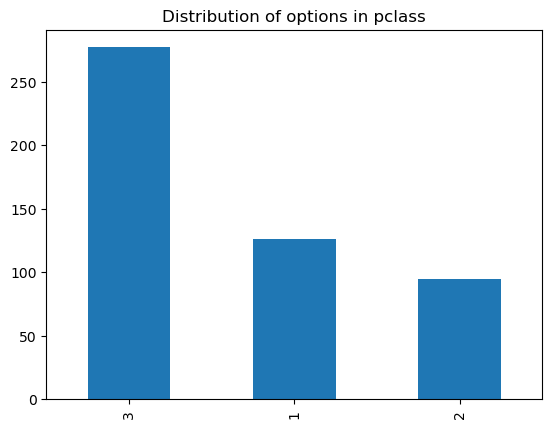

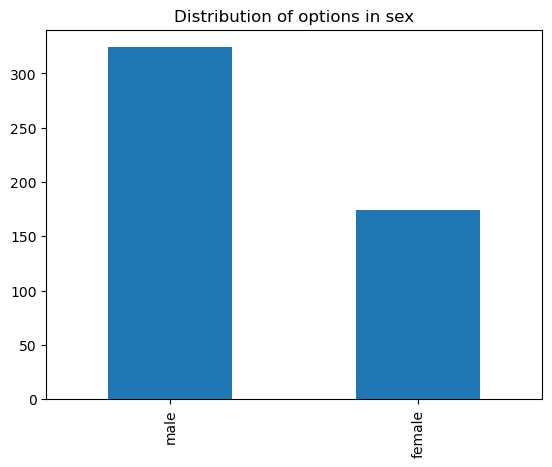

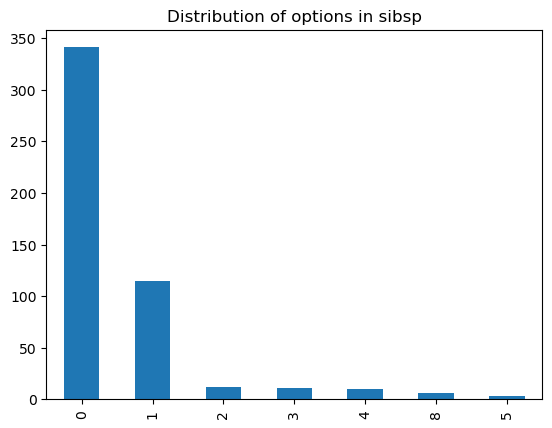

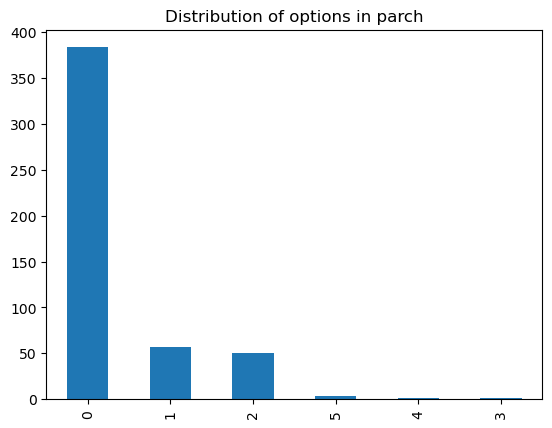

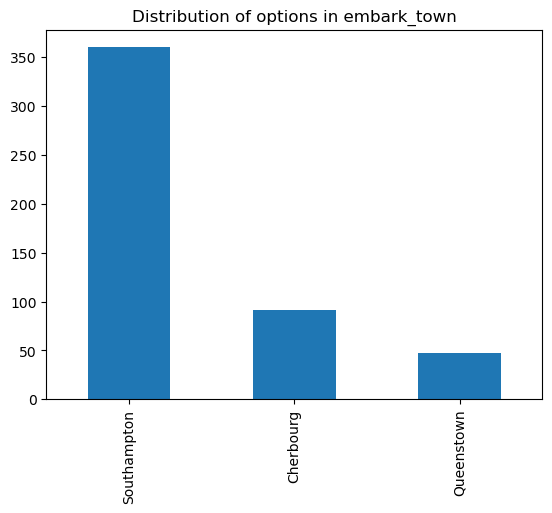

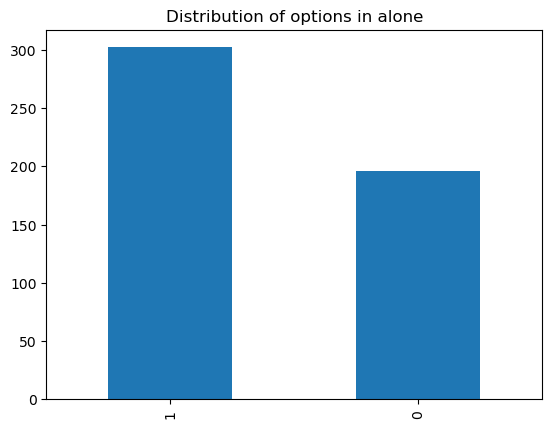

In [102]:
#Determine if certain columns should be dropped

#### I already cleaned up this data, dropping unwanted columns through my initial pass, but I should look at the data statistically and visually to see if there is zero interaction between it
#### and the target. If there appears to be no relationship, judiciously dropping the column would reduce a noisy picture in the end game.

for col in cat_cols:
    titanic_train[col].value_counts().plot(
        kind='bar').set(
        title=f'Distribution of options in {col}')
    plt.show()

In [107]:
#### I should compare embark_town with survival to see if there is anything there, otherwise, embark_town is a candidate to be removed. Chi-squared test?

null = "There is no association between embark_town & survival."
alpha = 0.05

observed = pd.crosstab(titanic_train.embark_town, titanic_train.survived)
observed

survived,0,1
embark_town,,
Cherbourg,42,49
Queenstown,27,20
Southampton,238,122


In [ ]:
#### Looking at the crosstab, I immediately see that the odds for life or death were around 50% for those from Cherbourg and Queenstown, but greatly disproportioned for Southampton. Why???
#### My spidey sense tingles and I smell a story. The plot thickens. . .

In [113]:
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=12.623635149678293, pvalue=0.0018147318289269555, dof=2, expected_freq=array([[ 56.09839357,  34.90160643],
       [ 28.97389558,  18.02610442],
       [221.92771084, 138.07228916]]))

In [114]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [115]:
print(f'''Observed:
{observed.values}

Expected:
{expected.astype(int)}
_____________________

𝛘² = {chi2:.4f}
p  = {p:.4f}
''')

Observed:
[[ 42  49]
 [ 27  20]
 [238 122]]

Expected:
[[ 56  34]
 [ 28  18]
 [221 138]]
_____________________

𝛘² = 12.6236
p  = 0.0018



In [116]:

if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We FAIL to reject H₀:{null}')

We reject H₀:There is no association between embark_town & survival.


In [ ]:
#### The results from my chi-squared test state that I SHOULD keep embark_town because there is something there.
#### Maybe a large portion of the population of the 3rd Class came from a specific embark_town (from Southampton), potentially a poorer area.

In [117]:
#Determine if it would be valuable to bin some numeric columns
num_cols

#### The are my numeric columns. 

['age', 'fare']

In [121]:
titanic_train['age'].describe()   #### It appears that the minimum age is 0.67 and the max age is 71, with a mean of 30. There were 498 passengers total. I'm not sure if it would be valuable
#### to bin age, but I'll do so and look at it over survival to see if there is anything there. I'll do so by children, adults, and elderly.

count    498.000000
mean      30.425703
std       12.790105
min        0.670000
25%       24.000000
50%       30.000000
75%       35.000000
max       71.000000
Name: age, dtype: float64

In [157]:
ages = pd.cut(titanic_train.age, bins = [0, 19, 60, 72]).sort_index()

aged_survival = pd.crosstab(ages, titanic_train.survived,)
aged_survival

survived,0,1
age,,
"(0, 19]",45,38
"(19, 60]",252,150
"(60, 72]",10,3


<Axes: ylabel='age'>

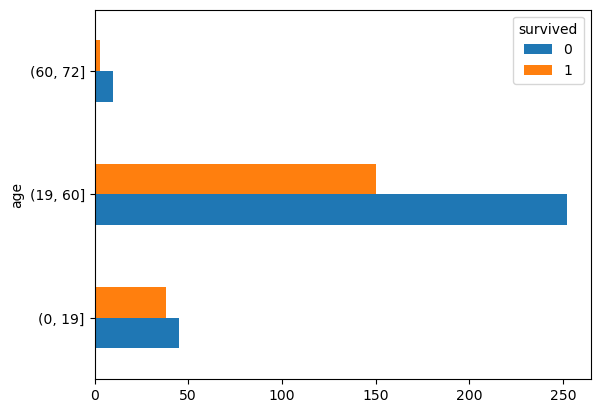

In [158]:

aged_survival.plot.barh()

In [ ]:
#### If I were to go along with binning "age", the only reason I could think so is that I would like to see if the 'class' or 'fare' of those in '0-19' age bin mattered in survival. You would think that
#### all of the children would be "first" in line for a life-boat, but apparently not.

In [159]:
#Determine if it would be valuable to combine multiple columns into one.
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 474 to 94
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     498 non-null    int64  
 1   pclass       498 non-null    int64  
 2   sex          498 non-null    object 
 3   age          498 non-null    float64
 4   sibsp        498 non-null    int64  
 5   parch        498 non-null    int64  
 6   fare         498 non-null    float64
 7   embark_town  498 non-null    object 
 8   alone        498 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 55.1+ KB


In [ ]:
#### If I were to combine multiple columns into one, I'd likely have to combine like dtypes that correlate with each other. I could possibly combine parch, sibsp, and alone into one to 
#### show whether someone was alone or not, regardless of how 'not alone' they were and compare that against survival.

In [161]:
together = pd.crosstab(titanic_train.sibsp, titanic_train.parch)
together
    

parch,0,1,2,3,4,5
sibsp,,,,,,
0,302,18,18,0,1,2
1,73,29,8,2,1,2
2,7,3,2,0,0,0
3,1,4,6,0,0,0
4,0,3,7,0,0,0
5,0,0,3,0,0,0
8,0,0,6,0,0,0


In [162]:
together2 = pd.crosstab(titanic_train.sibsp, titanic_train.alone)
together2

alone,0,1
sibsp,,
0,39,302
1,115,0
2,12,0
3,11,0
4,10,0
5,3,0
8,6,0


In [163]:
together3 = pd.crosstab(titanic_train.parch, titanic_train.alone)
together3

alone,0,1
parch,,
0,81,302
1,57,0
2,50,0
3,2,0
4,2,0
5,4,0


In [ ]:
#### looking at these three columns, there seems to be a little too much disparity between them to simply combine them in one or two colums for comparison

In [ ]:
#Does it make sense to combine any features?

##### Same conclusion as above

In [ ]:
#Do you find any surprises?

#### Although we already went through this process with this data in class, looking at it with my own lense, I found my questions different from that which was discussed previously. 

In [ ]:
#Findings and takeaways

#### I would like to see if the 'class' or 'fare' of those in the '0-19' age bin mattered in survival.
#### The results from my chi-squared test state that I SHOULD keep embark_town because there is something there.
#### Maybe a large portion of the population of the 3rd Class came from a specific embark_town (from Southampton), potentially a poorer area.

In [4]:
#Part III - Explore your telco data to discover drivers of churn
from prepare import wrangle_data
telco = wrangle_data('telco')

In [5]:
from prepare import split_data
telco_train, telco_val, telco_test = split_data(telco, 'telco')

In [6]:
telco_train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,
9705-IOVQQ,Male,1,Yes,Yes,61,Yes,Yes,No,Yes,No,No,Yes,Yes,No,99.00,5969.30,No,One year,Fiber optic,Electronic check
0635-WKOLD,Male,0,Yes,No,40,Yes,Yes,No,Yes,No,Yes,Yes,No,No,70.75,2921.75,No,One year,DSL,Credit card (automatic)
0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,Yes,No,No,No,No,No,No,30.50,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic)
4581-LNWUM,Female,0,No,No,13,No,No phone service,No,No,Yes,No,Yes,Yes,No,49.15,649.40,No,Month-to-month,DSL,Electronic check
6297-NOOPG,Female,0,Yes,No,70,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,110.50,7752.05,No,Two year,Fiber optic,Electronic check


In [7]:
## Determine if certain columns should be dropped
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3943 entries, 9705-IOVQQ to 3318-NMQXL
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 3943 non-null   object 
 1   senior_citizen         3943 non-null   int64  
 2   partner                3943 non-null   object 
 3   dependents             3943 non-null   object 
 4   tenure                 3943 non-null   int64  
 5   phone_service          3943 non-null   object 
 6   multiple_lines         3943 non-null   object 
 7   online_security        3943 non-null   object 
 8   online_backup          3943 non-null   object 
 9   device_protection      3943 non-null   object 
 10  tech_support           3943 non-null   object 
 11  streaming_tv           3943 non-null   object 
 12  streaming_movies       3943 non-null   object 
 13  paperless_billing      3943 non-null   object 
 14  monthly_charges        3943 non-null   float64

In [8]:
X_train = telco_train.drop(columns='churn')
y_train = telco_train[['churn']]


cat_cols, num_cols = [], []
for col in X_train.columns:
    if X_train[col].dtype == 'O':
        cat_cols.append(col)
    else:
        if X_train[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

In [9]:
cat_cols

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [10]:
num_cols

['tenure', 'monthly_charges', 'total_charges']

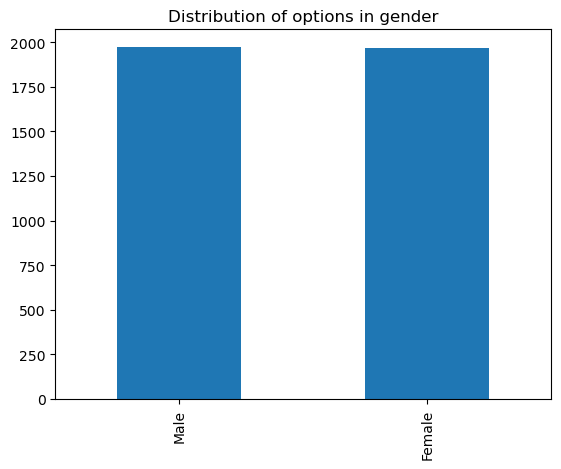

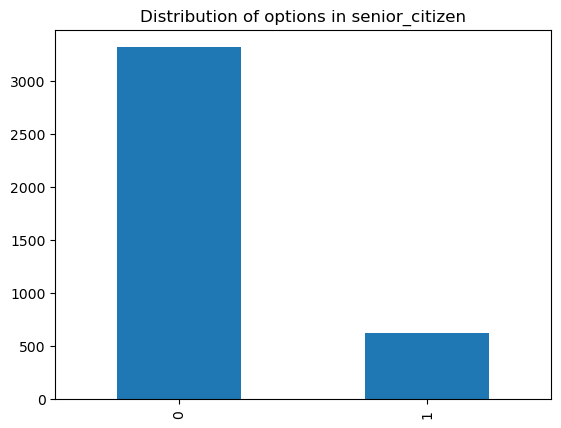

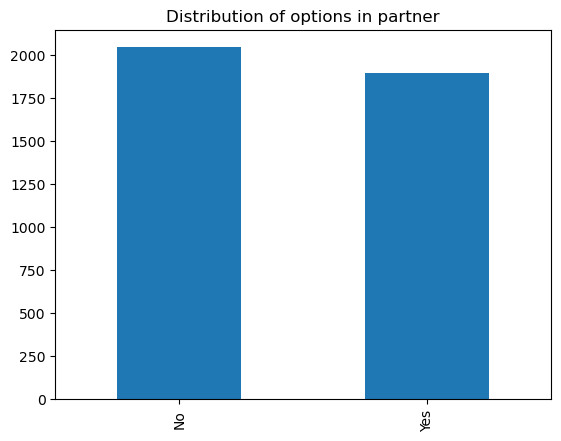

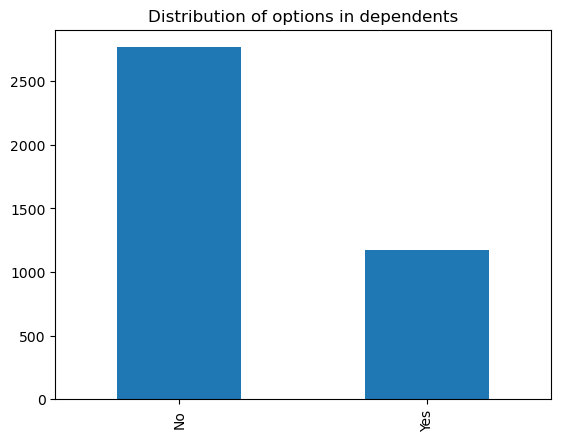

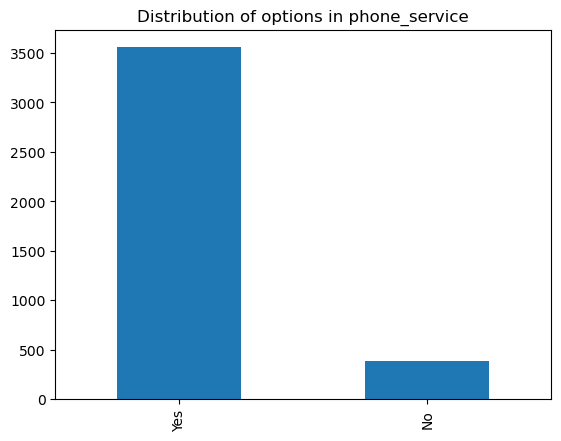

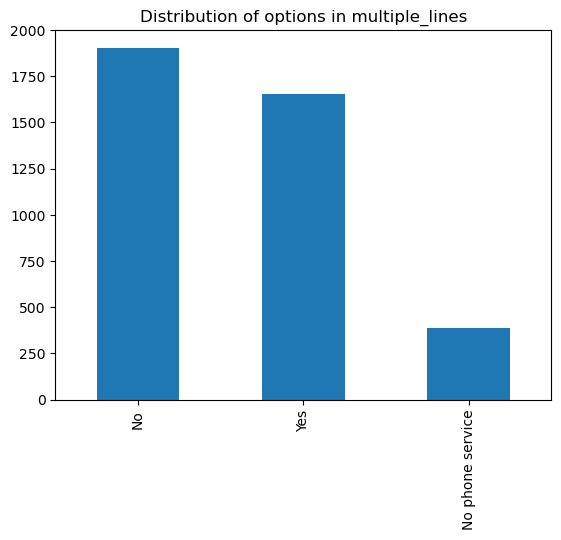

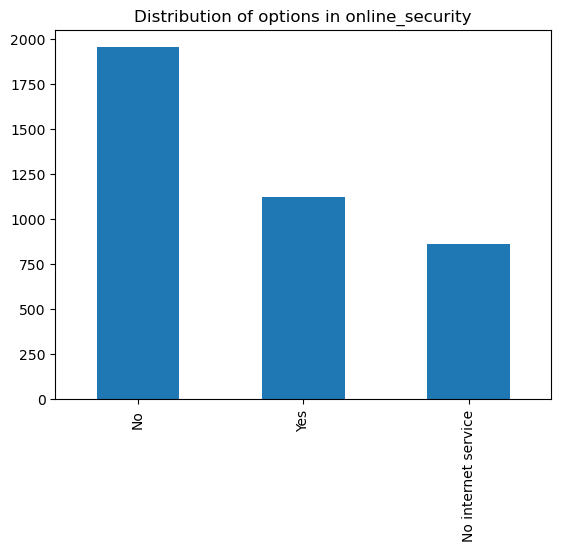

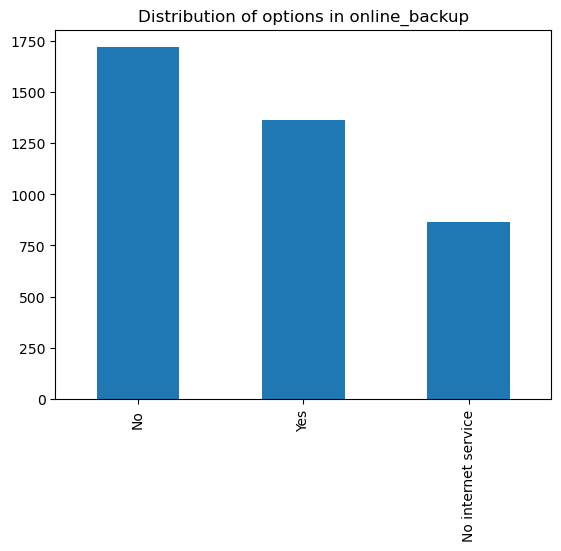

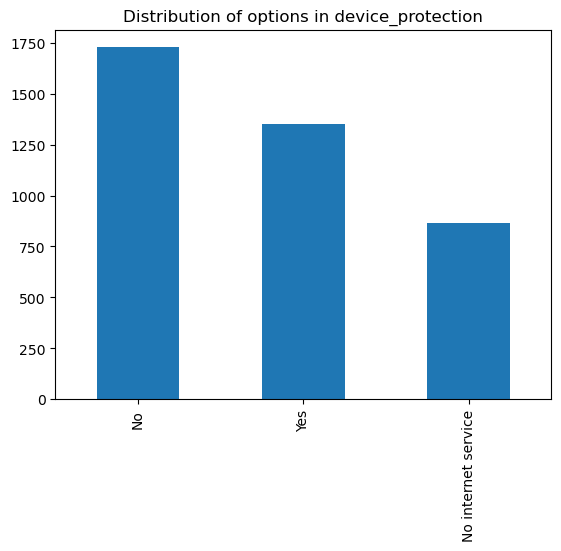

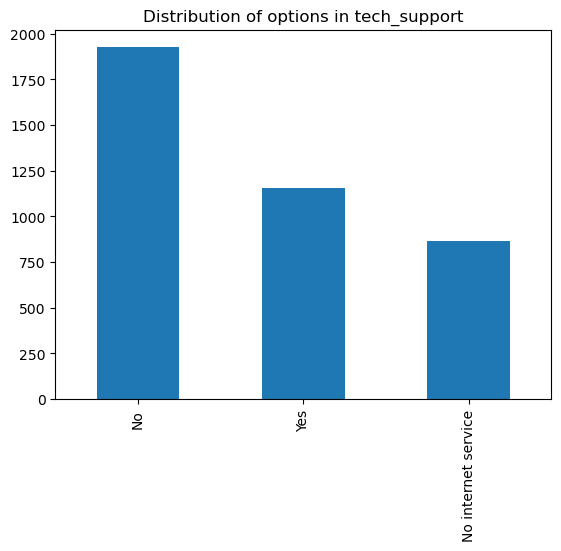

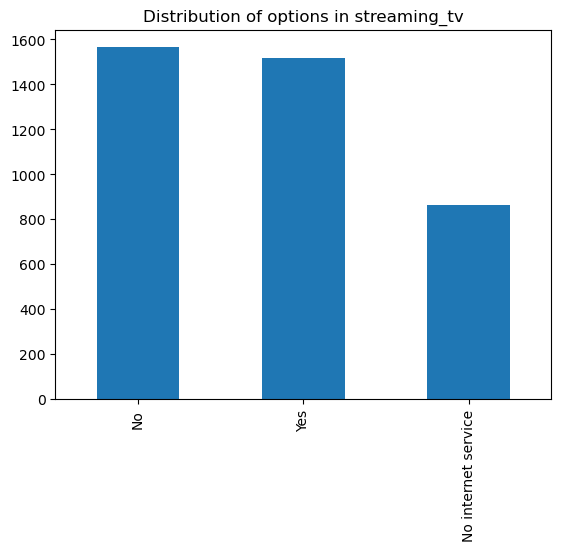

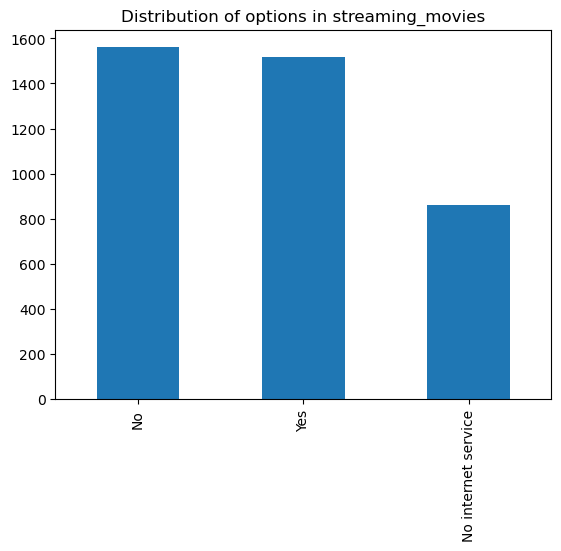

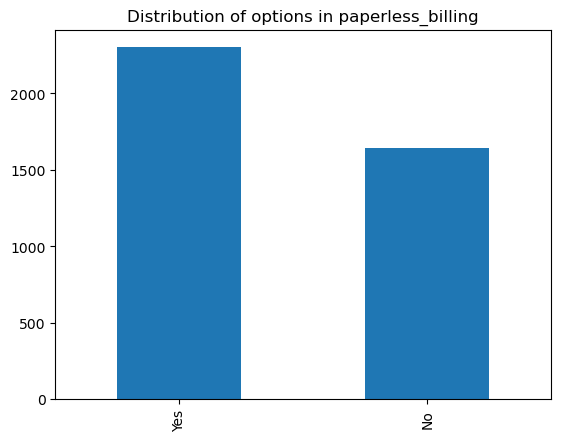

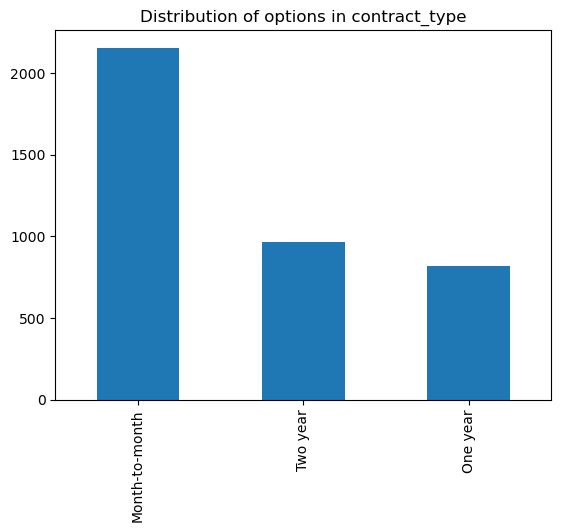

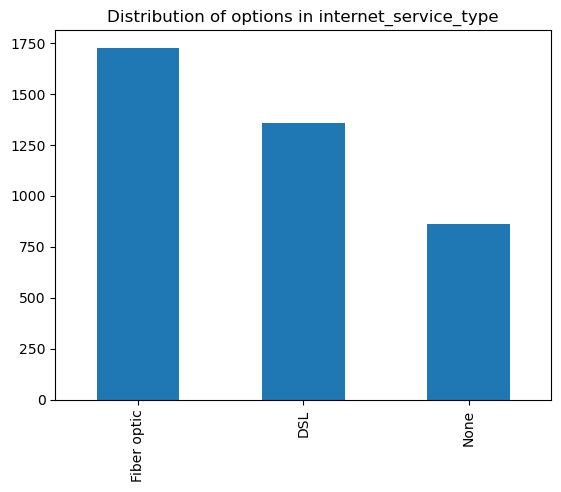

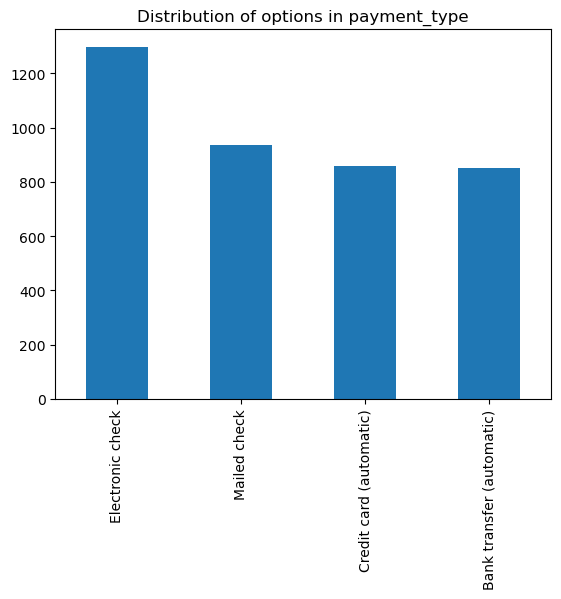

In [11]:
for col in cat_cols:
    telco_train[col].value_counts().plot(
        kind='bar').set(
        title=f'Distribution of options in {col}')
    plt.show()

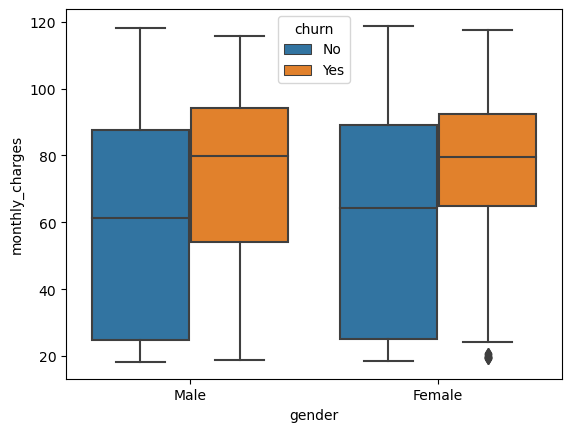

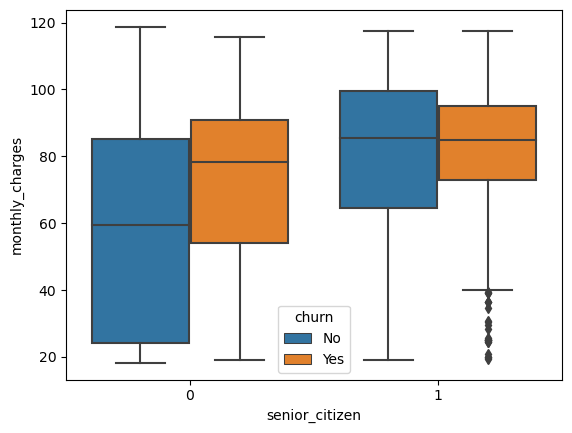

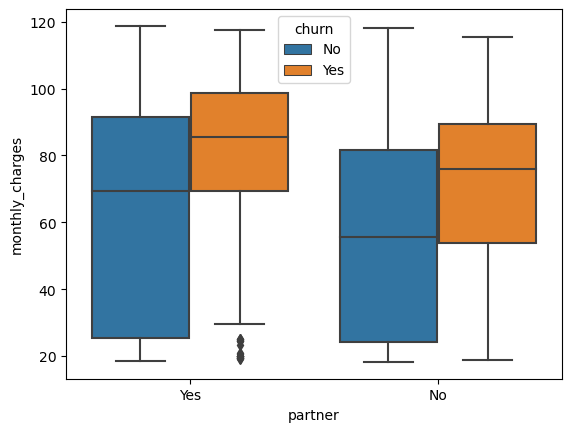

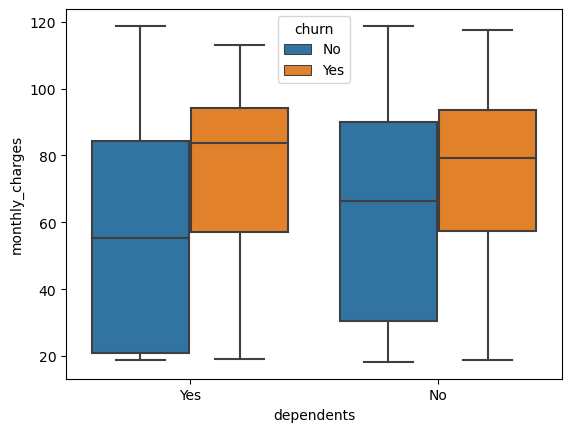

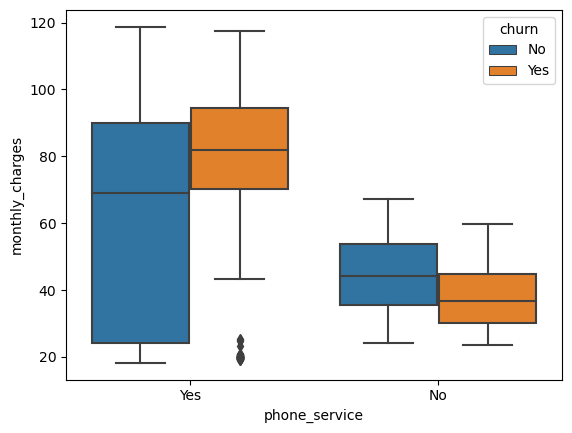

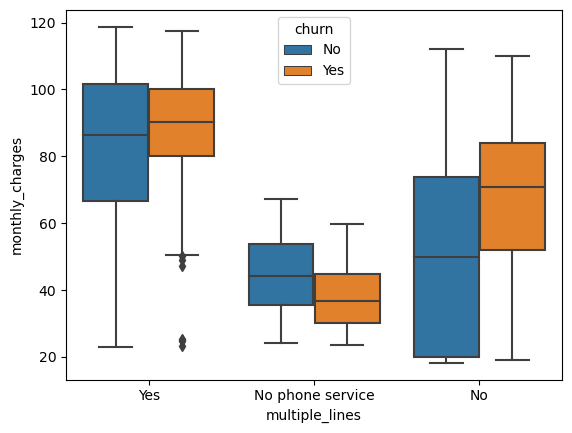

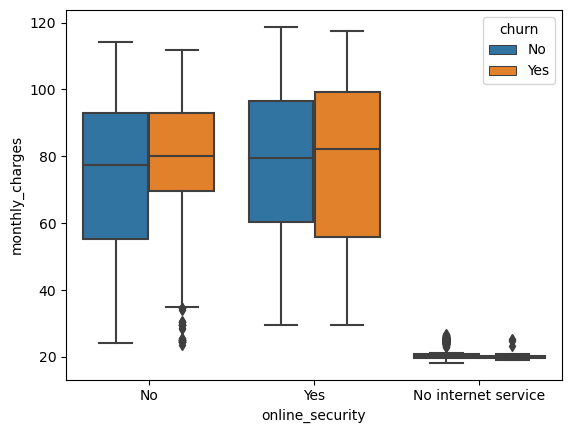

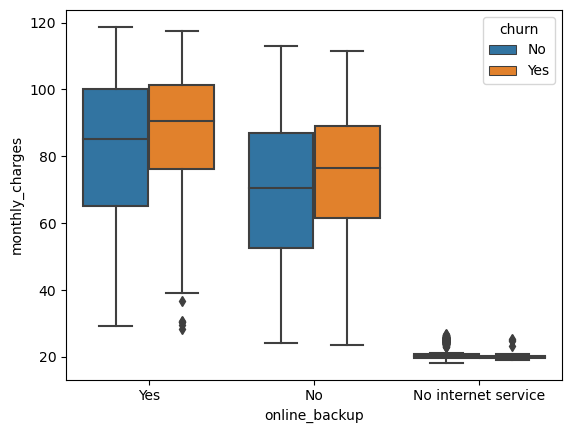

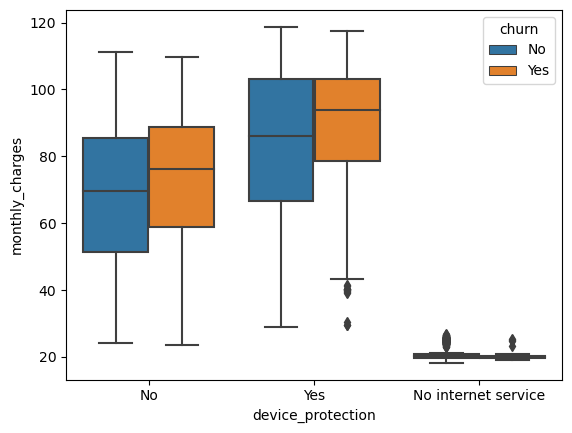

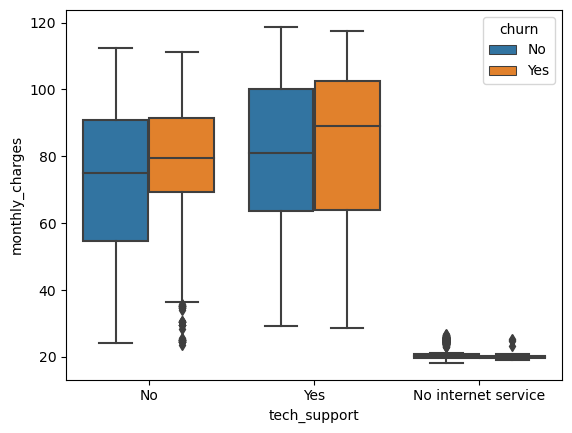

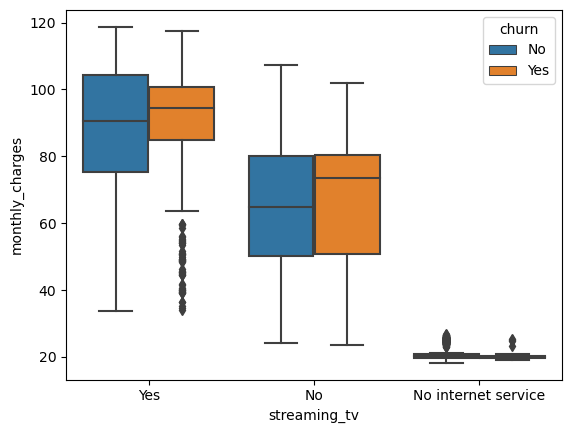

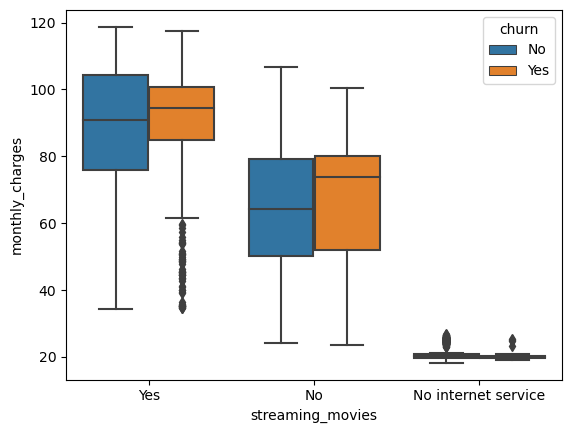

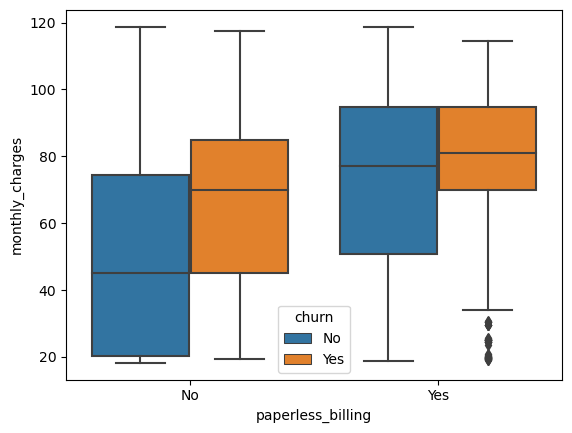

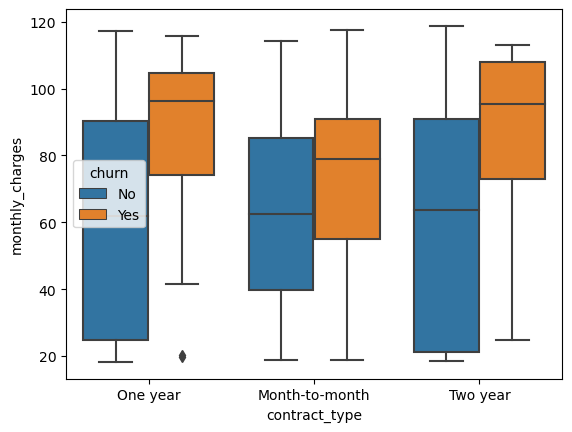

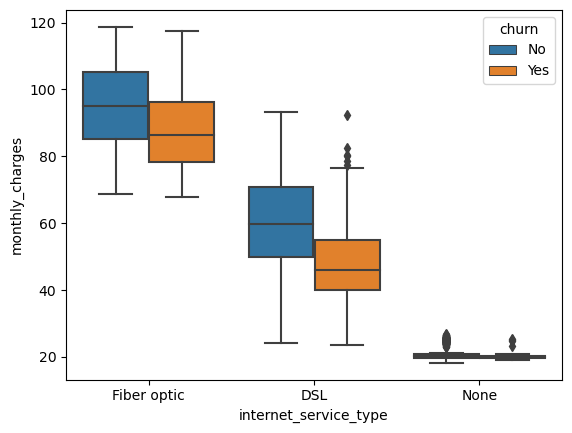

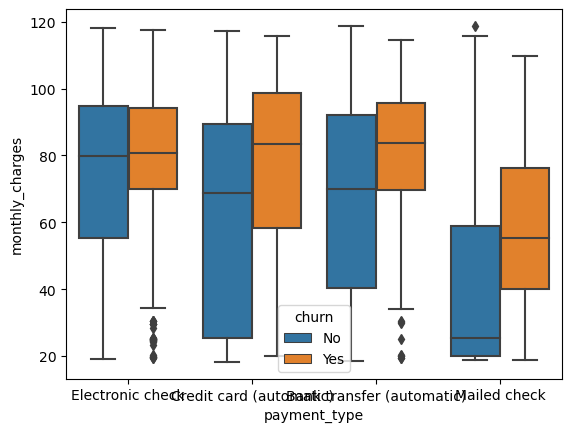

In [12]:
for col in cat_cols:
    #sns.boxplot(data = telco_train, y = telco_train.monthly_charges, x = 'payment_type', hue = 'churn')
    sns.boxplot(data = telco_train, y = telco_train.monthly_charges, x = col, hue = 'churn')
    plt.show()
    


In [ ]:
##### from a visual standpoint looking at each cat_col versus churn, I'd garner that online_security and gender might be the only columns I'd remove. 
##### There seems to be no difference in those categories in their relation to churn.  
##### At worst, I'd do a chi-squared test to see if there's anything worth looking at.
 

In [13]:
## Determine if it would be valuable to bin some numeric columns

num_cols

['tenure', 'monthly_charges', 'total_charges']

In [178]:
telco_train.tenure.describe() #### I do not think that I would put a range on this column

count    3943.000000
mean       32.223180
std        24.531767
min         0.000000
25%         9.000000
50%        28.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [179]:
telco_train.monthly_charges.describe() #### I'd put a range on this column

count    3943.000000
mean       64.600900
std        30.159764
min        18.250000
25%        35.575000
50%        70.050000
75%        89.800000
max       118.750000
Name: monthly_charges, dtype: float64

In [180]:
telco_train.total_charges.describe()   #### The range on this column is quite significant, so I think I'd definitely bin it

count     3943.000000
mean      3274.389488
std       6944.732566
min          0.000000
25%        419.800000
50%       1422.050000
75%       4155.375000
max      84050.000000
Name: total_charges, dtype: float64

In [14]:
monthly_charges_bin = pd.cut(telco_train.monthly_charges, bins = [18.25, 35.576, 89.80, 118.75]).sort_index()
total_charges_bin = pd.cut(telco_train.total_charges, bins = [0, 420, 4155.376, 84050]).sort_index()

bin1 = pd.crosstab(monthly_charges_bin, telco_train.churn)
bin2 = pd.crosstab(total_charges_bin, telco_train.churn)
bin1, bin2

(churn              No  Yes
 monthly_charges           
 (18.25, 35.576]   885  100
 (35.576, 89.8]   1343  631
 (89.8, 118.75]    668  315,
 churn                  No  Yes
 total_charges                 
 (0.0, 420.0]          554  426
 (420.0, 4155.376]    1492  478
 (4155.376, 84050.0]   844  142)

In [16]:
## Determine if it would be valuable to combine multiple columns into one.

#### no_streaming and no_movies columns seem to be almost identical from a visual standpoint. These are the only candidates I see from a quick glance. Let's run a crosstab.

pd.crosstab(telco.streaming_tv, telco.streaming_movies)

streaming_movies,No,No internet service,Yes
streaming_tv,,,
No,2018,0,792
No internet service,0,1526,0
Yes,767,0,1940


In [19]:
telco[['streaming_tv', 'streaming_movies']].head()  #### It would appear that combining these two columns would not be wise since they are not exactly identical, item for item.

,streaming_tv,streaming_movies
customer_id,,
0002-ORFBO,Yes,No
0003-MKNFE,No,Yes
0004-TLHLJ,No,No
0011-IGKFF,Yes,Yes
0013-EXCHZ,Yes,No
